# Unit 3 Career Simulation - AAL Sales Analysis
## Project Statement
AAL is a household name in the United States, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states, metropolises, and tier-1 and tier-2 cities in the United States.  
The business is booming, and the company is in expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
1)	Determine the states that are generating the highest revenues.
2)	Formulate sales programs for states with lower revenues. 

The Head of S&M has approached you to analyze the company’s sales data for the fourth quarter across the United States and help the company make data-driven decisions for the coming year. Enclosed is the CSV (USApparalSales4thQrt2020.csv)  file that covers the said data.

### Perform the following Steps
As a data scientist, you must perform the following tasks on the enclosed data:
1.	Data Wrangling
2.	Data Analysis
3.	Data Visualization 
4.	Report Generation

### Data Wrangling
* Ensure that the data is clean and there is no missing or incorrect data. 
    - Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
* Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (Dropping the null values or filling them).
* Select an appropriate data wrangling approach (data standardization or data normalization). Perform the standardization or normalization and present the data.
* Share your recommendation on the usage of the groupby() function for data chunking or merging.
### Data Analysis
* Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode, and standard deviation can be used.). 
* Determine which group is generating the highest sales and the lowest sales.
* Determine which state is generating the highest sales and the lowest sales.
* Generate weekly, monthly, and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, and SciPy to perform the analysis.)

### Data Visualization
* Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes the key parameters like:
    - State-wise sales analysis for different groups (kids, women, men, and seniors)
    - Group-wise sales analysis (kids, women, men, and seniors) across different states
    - Time-of-the-day analysis: During which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales, such as hyper-personalization and Next Best Offers.]
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
* Include your recommendation and indicate why you are choosing the recommended visualization package.

### Report Generation 
* Use JupyterLab Notebook for report generation (wrangling, analysis, and visualization). Please note that JupyterLab allows you to mix code with graphs and plots.
* Use Markdown in suitable places while presenting your report. 
* The report should contain suitable graphs, plots, analysis reports, and recommendations. Please note that different aspects of the analysis demand different graphs/plots. 
    - Box plots are suitable for descriptive statistics.
    - Seaborn distribution plots are suitable for any other statistical plotting.

# Analysis and Report on Sales of AAL

As a part of this, the very first step is that we are going to import the necessary libraries, and they are as follows:

```
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
```

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In the next, we are going to read the .csv file and store that as a dataframe called ```df```.

In [2]:
df = pd.read_csv('USApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': "string", 'State': "string", 'Group': "string"})

Now, print the dataframe ```df``` and ascertain the number of rows and colums of data.

In [3]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TX,Seniors,14,35000
7556,2020-12-30,Evening,TX,Kids,15,37500
7557,2020-12-30,Evening,TX,Men,15,37500
7558,2020-12-30,Evening,TX,Women,11,27500


In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There are 7560 rows and 6 columns in the dataframe


**Observations:**
- Record your observations on the dataset here.

## Test for NA values:

In [5]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [7]:
print(f"There are no null values in this entire dataframe, therefore we do not need to drop or fill in any values.")

There are no null values in this entire dataframe, therefore we do not need to drop or fill in any values.


**Observations:**
- Record your observations here.


## Data Wrangling (Data Normalization)

For performing the data normalization, first of all, we need to separate the numerical and non numerica data. We will create a new dataframe called df_dataonly from the existing df object, as follows:

In [8]:
df_dataonly = df[["Unit", "Sales"]]
df_dataonly.head(25)

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
5,10,25000
6,3,7500
7,11,27500
8,15,37500
9,15,37500


Now, from the MinMaxScalar object, create a normalize object, as shown below:

In [9]:
scaler = MinMaxScaler()

Next, invoke the ```fit_transform()``` method, and pass this newly created object called ```df_dataonly```. Let's name the resulting object as ```normalize_data```.

In [10]:
normalize_data = scaler.fit_transform(df_dataonly)

In [11]:
normalize_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

normalize_data object is a ndarray of 2 columns and 7560 rows. The first columns in the Unit, and the second column is the Sales data. The normalization will render normalize the data for each column between 0 and 1. You can test it as follows:

```normalize_data[:, [0]]``` will list all the values of normailzed **Unit** values, while ```normalize_data[:, [1]]``` will list all the values of normalized **Sales** values.

In [12]:
normalize_data[:, [0]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [13]:
normalize_data[:, [1]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

Now, check the min and max values of each of the column. Min should be 0.0 and max should be 1.0, for **Unit** as well as **Sales** column. Let's print them as follows:

In [14]:
print(normalize_data[:, [0]].min(), normalize_data[:, [0]].max())

0.0 0.9999999999999999


In [15]:
print(normalize_data[:, [1]].min(), normalize_data[:, [1]].max())

0.0 1.0


## Top Level Picture
Let's plot the Date versus Unit and Date versus Sales line plot for the entire season. Note the values of **Unit** and **Sales** are summed up for each day.

In [16]:
dates = df['Date']
dates
##TODO
# Create a datatable with the daily units and sales figures. Save the result in a DataFrame called df_unit_and_sales.

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]

In [17]:
df_unit_and_sales = pd.DataFrame(df, columns=["Unit", "Sales"])
df_unit_and_sales["Date"] = dates
df_unit_and_sales

,Unit,Sales,Date
0,8,20000,2020-10-01
1,8,20000,2020-10-01
2,4,10000,2020-10-01
3,15,37500,2020-10-01
4,3,7500,2020-10-01
...,...,...,...
7555,14,35000,2020-12-30
7556,15,37500,2020-12-30
7557,15,37500,2020-12-30
7558,11,27500,2020-12-30



## Monthly Data Analysis
Now, let's chunk this quarterly data into monthly data and perform the analysis. For each of the month, let's get the sub-dataframe, using the ```loc``` feature of dataframe, and pass the range by date. For example, for the month of October, the range for ```loc``` will be ```'2020-10-01':'2020-10-30'```, and we will be capturing it as ```df_oct```. Similarly, for the month of November and December, we have sub-dataframe objects ```df_nov``` and ```df.dec```. These are shown in the next 3 steps.

In [18]:
df_oct = df_unit_and_sales[df_unit_and_sales["Date"].dt.month == 10].groupby("Date").sum()

In [19]:
df_nov = df_unit_and_sales[df_unit_and_sales["Date"].dt.month == 11].groupby("Date").sum()

In [20]:
df_dec = df_unit_and_sales[df_unit_and_sales["Date"].dt.month == 12].groupby("Date").sum()

In [21]:
df_oct

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
2020-10-06,1584,3960000
2020-10-07,1485,3712500
2020-10-08,1578,3945000
2020-10-09,1458,3645000


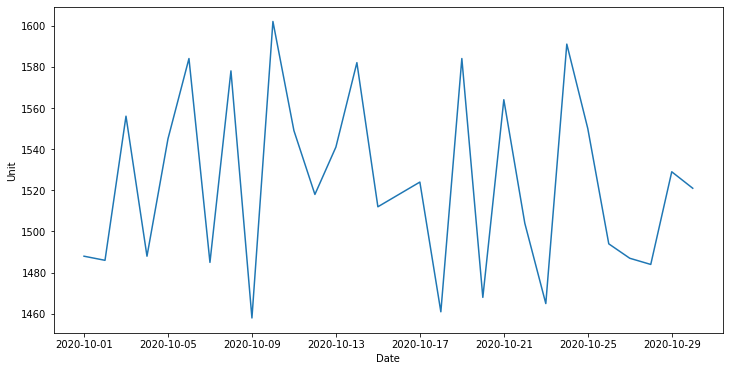

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_oct, x="Date", y="Unit")
plt.show()

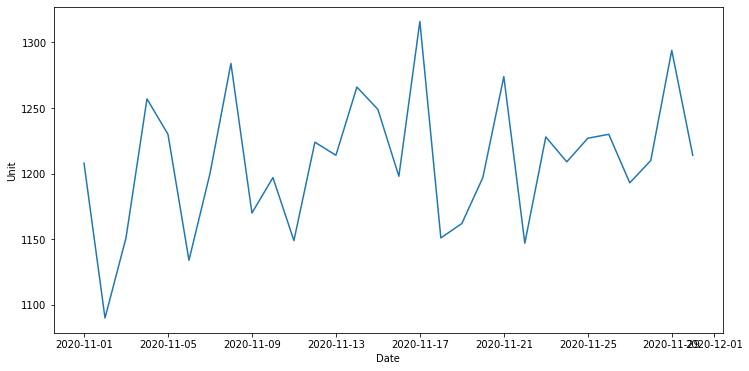

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_nov, x="Date", y="Unit")
plt.show()

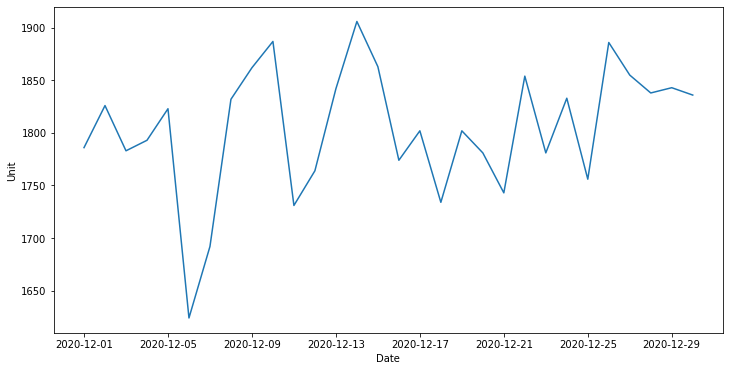

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dec, x="Date", y="Unit")
plt.show()

## Describing Data
### Data Description
Describing the data will give you the very first level information on the data with the basic information on the data such as ```count```, ```mean```, ```std``` (standard deviation), ```min```, ```max``` and the quartiles. You will use the ```describe()``` command on the dataframe to get it. All the values are for the entire three month period.

In [25]:
df_unit_and_sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


For individual three months, we can invole ```describe()``` on ```df_oct```, ```df_nov``` and ```df_dec```, as shown:

In [26]:
df_oct.describe().round(2)

,Unit,Sales
count,30.00,30.00
mean,1523.87,3809666.67
std,43.04,107604.67
min,1458.00,3645000.00
25%,1487.25,3718125.00
50%,1519.50,3798750.00
75%,1554.50,3886250.00
max,1602.00,4005000.00


In [27]:
df_nov.describe().round(2)

,Unit,Sales
count,30.00,30.00
mean,1209.10,3022750.00
std,51.18,127943.53
min,1090.00,2725000.00
25%,1175.75,2939375.00
50%,1209.50,3023750.00
75%,1230.00,3075000.00
max,1316.00,3290000.00


In [28]:
df_dec.describe().round(2)

,Unit,Sales
count,30.00,30.00
mean,1804.40,4511000.00
std,61.37,153425.82
min,1624.00,4060000.00
25%,1775.75,4439375.00
50%,1812.50,4531250.00
75%,1842.75,4606875.00
max,1906.00,4765000.00


### Box Plot Analysis
#### Unit Analysis

[Text(0.5, 1.0, 'December Units')]

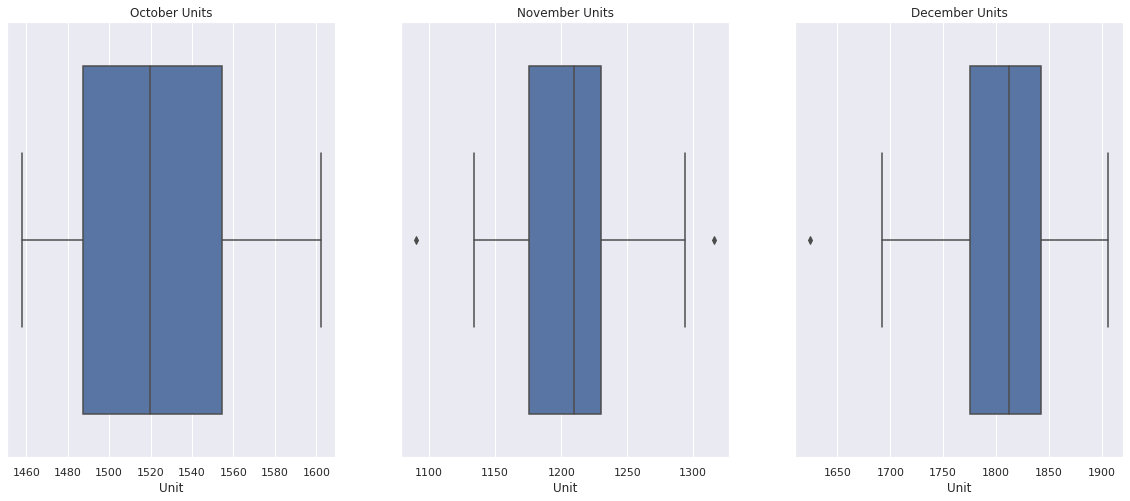

In [29]:
sns.set(rc={"figure.figsize":(20,8)})
fig, axes = plt.subplots(1, 3)
bp_oct = sns.boxplot(x="Unit", data=df_oct, ax=axes[0])
bp_nov = sns.boxplot(x="Unit", data=df_nov, ax=axes[1])
bp_dec = sns.boxplot(x="Unit", data=df_dec, ax=axes[2])
bp_oct.set(title="October Units")
bp_nov.set(title="November Units")
bp_dec.set(title="December Units")

In the above boxplots, you can see the variation in the quartiles for three different months. For the month of October, it is rather wide-spread with a mean value of 1523, where as, for the month of November and December, they are rather narrow. For November, the mean value is 1209, and for the month of December, it is 1804. 

#### Sales Analysis

[Text(0.5, 1.0, 'December Sales')]

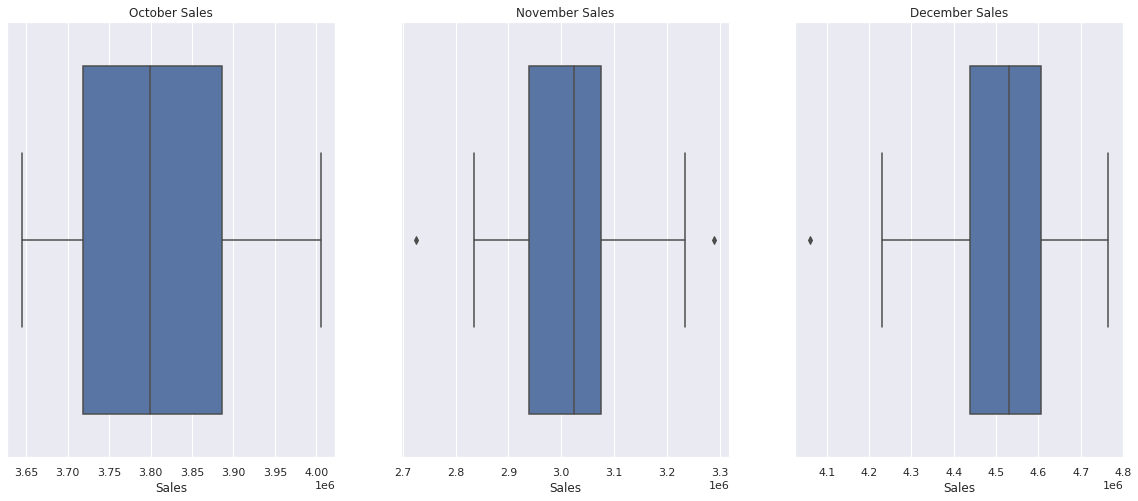

In [30]:
sns.set(rc={"figure.figsize":(20,8)})
fig, axes = plt.subplots(1, 3)
bp2_oct = sns.boxplot(x="Sales", data=df_oct, ax=axes[0])
bp2_nov = sns.boxplot(x="Sales", data=df_nov, ax=axes[1])
bp2_dec = sns.boxplot(x="Sales", data=df_dec, ax=axes[2])
bp2_oct.set(title="October Sales")
bp2_nov.set(title="November Sales")
bp2_dec.set(title="December Sales")

In the above boxplots, you can see the variation in the quartiles for three different months. For the month of October, it is rather wide-spread with a mean value of 3809666.67, where as, for the month of November and December, they are rather narrow. For November, the mean value is 3022750.00, and for the month of December, it is 4511000.00. November's sales have two outliers and December's sales has one.

**Observations:**
- Record your observations here.


## Monthly Plots and Analysis
In the above section, we separated the data month wise and performed the top-level description to get the main statistics of the sales. In this section, we will plot, month-wise and do a comparative study on the numbers.

### Overall Unit and Sales figures

In [31]:
oct_days = df_oct.index.day
oct_days.astype('str')
nov_days = df_nov.index.day
nov_days.astype('str')
dec_days = df_dec.index.day
dec_days.astype('str')

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')

#### Units sold in October, November and December
For this, we can use bar plot of seaborn, and sub-plots feature of Matplotlib. All the three months are plotted on the same level. 

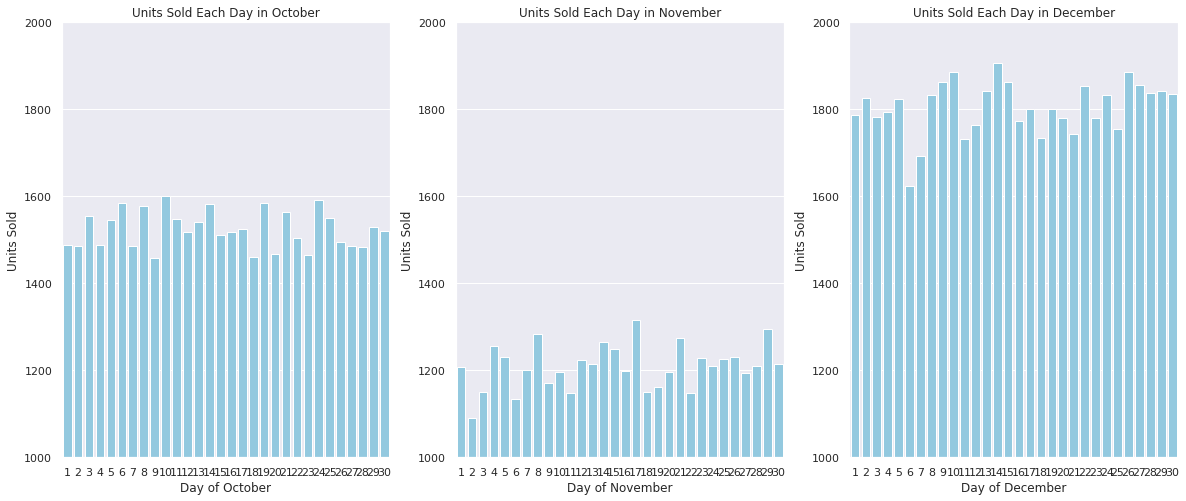

In [32]:
sns.set(rc={"figure.figsize":(20,8)})
fig, axes = plt.subplots(1, 3)

bp_oct = sns.barplot(x= oct_days, y="Unit", data=df_oct, ax=axes[0], color="skyblue")
bp_nov = sns.barplot(x= nov_days, y="Unit", data=df_nov, ax=axes[1], color="skyblue")
bp_dec = sns.barplot(x= dec_days, y="Unit", data=df_dec, ax=axes[2], color="skyblue")

axes[0].set_xlabel("Day of October")
axes[0].set_ylabel("Units Sold")
axes[0].set_title("Units Sold Each Day in October")
axes[0].set_ylim(1000, 2000) 

axes[1].set_xlabel("Day of November")
axes[1].set_ylabel("Units Sold")
axes[1].set_title("Units Sold Each Day in November")
axes[1].set_ylim(1000, 2000) 

axes[2].set_xlabel("Day of December")
axes[2].set_ylabel("Units Sold")
axes[2].set_title("Units Sold Each Day in December")
axes[2].set_ylim(1000, 2000) 

plt.show()

o = bp_oct.set_xticklabels(oct_days)
n = bp_nov.set_xticklabels(nov_days)
d = bp_dec.set_xticklabels(dec_days)

### Sales numbers for October, November and December
We are using lineplot for seaborn, and once again, we use sub-plot features of Matplotlib, and the sales figures are plotted for each month.

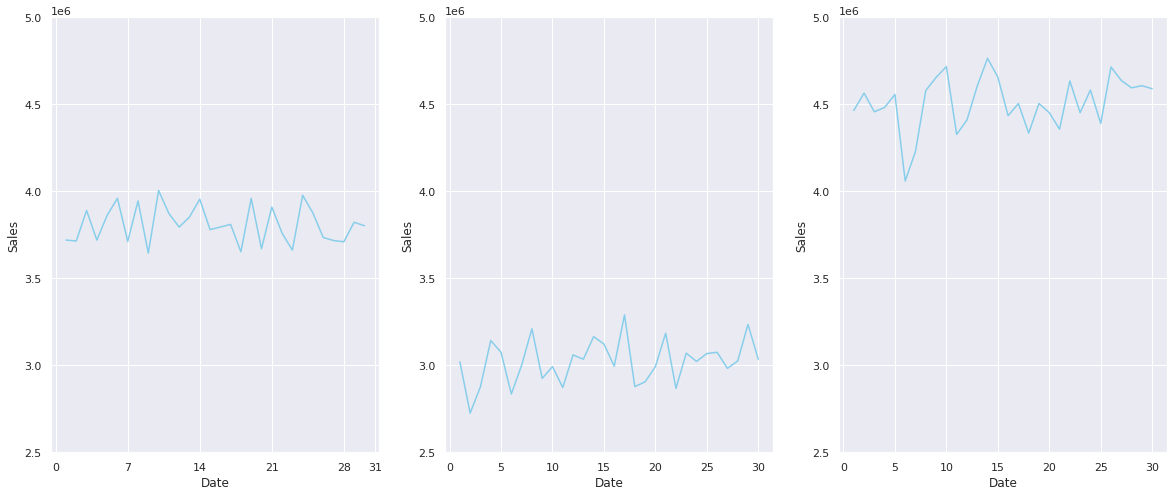

In [33]:
import matplotlib
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)

lp_oct = sns.lineplot(x= oct_days, y="Sales", data=df_oct, ax=axes[0], color="skyblue")
lp_nov = sns.lineplot(x= nov_days, y="Sales", data=df_nov, ax=axes[1], color="skyblue")
lp_dec = sns.lineplot(x= dec_days, y="Sales", data=df_dec, ax=axes[2], color="skyblue")
lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))

loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))

lp_oct.xaxis.set_major_locator(loc)

### Consolidated 3 month Sales plot
The following is the typical Sales figures, using the lineplot of seaborn. Notice that we are using the original dataframe object df, and this has all the three months of data, as against the previous three, where the three sub-dataframes are separated by ```groupby()``` feature of pandas. One more point to be noted here. This plot is different from the plot above, and this is evident from the values of y-axis. The difference here is that the above figures are consolidated data for each month, including the **Group** and **Time** data, which are categorical in nature.

<AxesSubplot: xlabel='Date', ylabel='Sales'>

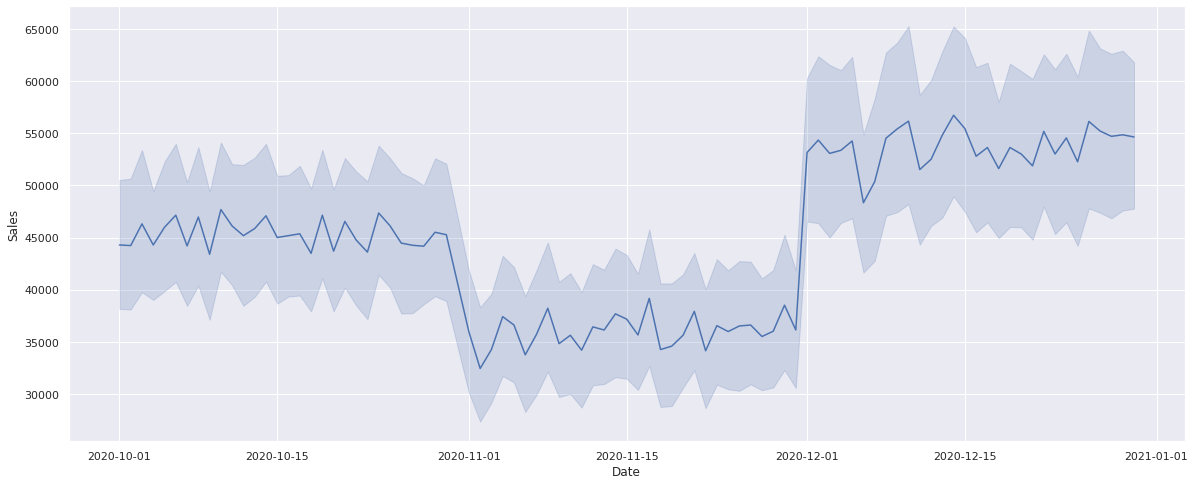

In [34]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x = 'Date', y = 'Sales', data = df)

One more aspect of this is that this line plot is inclusive of stastical estimation and errors bars that are superimposed on the line plot. This is the special feature of seaborn. This is provided even though it is not asked for.

## Comprehensive Snapshot
The following are the complete month-wise snapshots that shows monthly Units sales on the top-row, and monthly Sales in the bottom. The sub-plot feature is used to get a complets comprehensive shanshot for the three months.

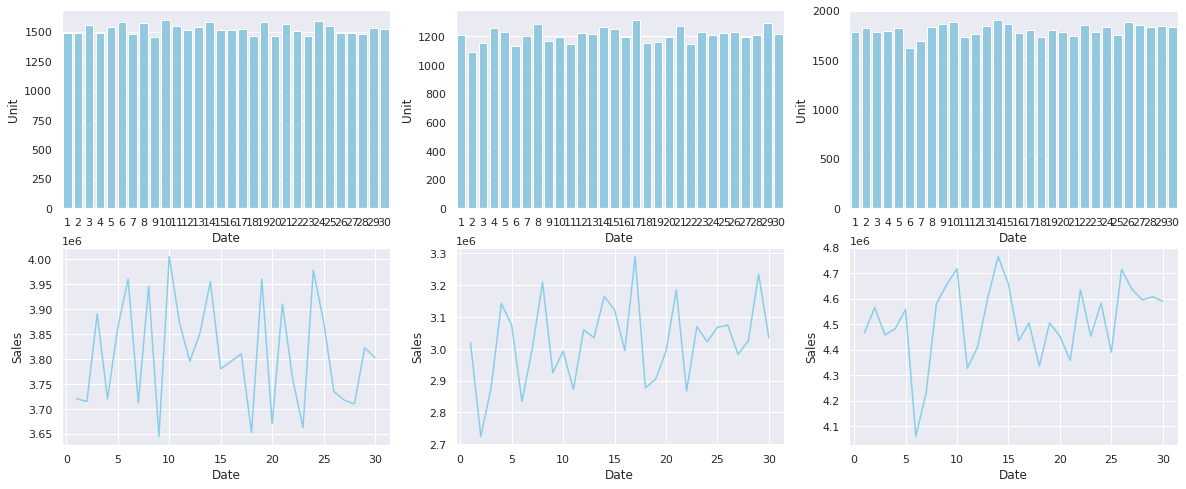

In [35]:
fig, axes = plt.subplots(2, 3)
sns.set(rc={'figure.figsize':(20,8)})

#TODO
# Combine the barplots for Units sold and the lineplots for sales in a comprehensive snapshot. The output will display 6 graphs in a single view.
# Remember to set the x-labels, y-limits, and titles to differentiate between the graphs.

sns.barplot(x= oct_days, y="Unit", data=df_oct, ax=axes[0,0], color="skyblue")
sns.barplot(x= nov_days, y="Unit", data=df_nov, ax=axes[0,1], color="skyblue")
sns.barplot(x= dec_days, y="Unit", data=df_dec, ax=axes[0,2], color="skyblue")

sns.lineplot(x= oct_days, y="Sales", data=df_oct, ax=axes[1,0], color="skyblue")
sns.lineplot(x= nov_days, y="Sales", data=df_nov, ax=axes[1,1], color="skyblue")
sns.lineplot(x= dec_days, y="Sales", data=df_dec, ax=axes[1,2], color="skyblue")

lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))

loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))

lp_oct.xaxis.set_major_locator(loc)

## Analysis of Statewise sales in the United States
We are going to perform the analysis based on the categorical data of the problem. There are three main categories - **State**, **Group** and **Time**. In the first, we are going to pivot our main dataframe ```df``` indexed on **State**, and also we are providing 2 ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```state_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [36]:
state_pivot = df.pivot_table(index="State", aggfunc={"Sales": ["sum", "mean"]})

print(state_pivot)
state_pivot[("Sales", "mean")]

              Sales           
               mean        sum
State                         
 WA    20511.574074   22152500
AZ     20907.407407   22580000
CA     30942.129630   33417500
FL     54497.685185   58857500
KY     97745.370370  105565000
NY     69416.666667   74970000
TX     21074.074074   22760000


State
 WA    20511.574074
AZ     20907.407407
CA     30942.129630
FL     54497.685185
KY     97745.370370
NY     69416.666667
TX     21074.074074
Name: (Sales, mean), dtype: float64

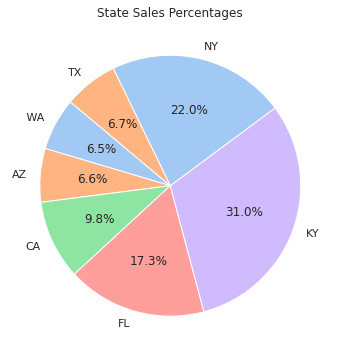

In [37]:
labels = state_pivot[("Sales", "mean")].index.to_list()
labels
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    state_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)

plt.title("State Sales Percentages")
plt.show()

The pie chart reveals significant differences in sales across states. Kentucky leads with the highest sales at 31%, followed by New York with 22%. Florida and California show moderate sales, with 17.3% and 9.8% units, respectively. Washington, Arizona, and Texas have the lowest sales, each around 6.6%. This pie chart suggests that Kentucky and New York are major contributors, while sales are relatively low in other states.

**Observations:**
- Record your observations from the pie chart here.


## Groupwise Analysis
We are going to perform the analysis based on the next categorical data of the problem - **Group**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Group**, and also we are providing the same two ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```group_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [38]:
group_pivot = df.pivot_table(index="Group", aggfunc={"Sales": ["sum", "mean"], "Unit": ["sum", "mean"]})

print(group_pivot)
group_pivot[("Sales", "mean")]

                Sales                 Unit       
                 mean       sum       mean    sum
Group                                            
Kids     45011.904762  85072500  18.004762  34029
Men      45370.370370  85750000  18.148148  34300
Seniors  44464.285714  84037500  17.785714  33615
Women    45207.671958  85442500  18.083069  34177


Group
Kids       45011.904762
Men        45370.370370
Seniors    44464.285714
Women      45207.671958
Name: (Sales, mean), dtype: float64

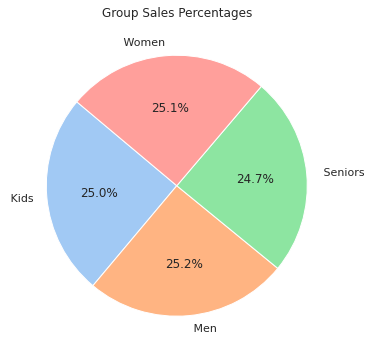

In [39]:
labels = group_pivot[("Sales", "mean")].index.to_list()
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    group_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)

plt.title("Group Sales Percentages")
plt.show()

The pie chart shows sales are spread almost evenly across all groups. Men make up 25.2% of sales, followed by Women at 25.1%, Kids at 25.0%, and Seniors at 24.7%. Each group contributes about a quarter of the total sales, showing steady demand across all ages.

**Observations:**
- Record your observations from the pie chart here.


## Timewise Analysis
We are going to perform the analysis based on the next categorical data of the problem - **Time**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Time**, and also we are providing the same two ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```time_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [40]:
time_pivot = df.pivot_table(index="Time", aggfunc={"Sales": ["sum", "mean"], "Unit": ["sum", "mean"]})

print(time_pivot)
time_pivot[("Sales", "mean")]

                  Sales                  Unit       
                   mean        sum       mean    sum
Time                                                
Afternoon  45241.071429  114007500  18.096429  45603
Evening    44479.166667  112087500  17.791667  44835
Morning    45320.436508  114207500  18.128175  45683


Time
Afternoon    45241.071429
Evening      44479.166667
Morning      45320.436508
Name: (Sales, mean), dtype: float64

[' Afternoon', ' Evening', ' Morning']


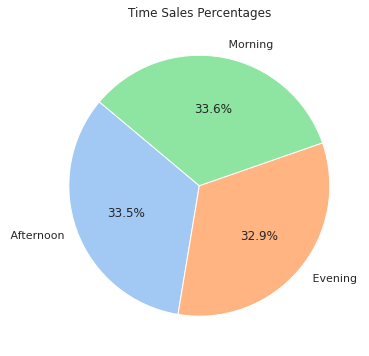

In [41]:
labels = time_pivot[("Sales", "mean")].index.to_list()
print(labels)
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    time_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)
plt.title("Time Sales Percentages")
plt.show()

The pie chart shows a nearly even split in sales across different times of day. Morning leads slightly with 33.6% of sales, followed by Afternoon with 33.5%, and Evening with 32.9%. This balance suggests that sales remain steady throughout the day, with no particular time standing out significantly.

**Observations:**
- Record your observations from the pie chart here.


# Report
- Compile the findings from your analysis here for the Head of S&M.

My findings reveal that states such as Kentucky, New York, and Florida are generating the highest revenues, significantly contributing to the overall sales performance. In contrast, states like Washington, Arizona, and Texas exhibit lower revenue figures, indicating potential areas for growth. 

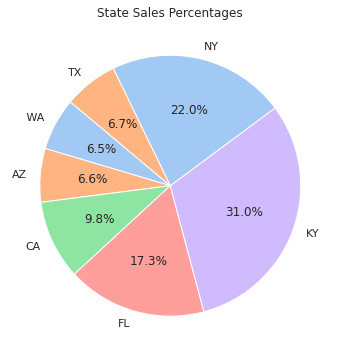

In [42]:
labels = state_pivot[("Sales", "mean")].index.to_list()
labels
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    state_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)

plt.title("State Sales Percentages")
plt.show()

Notably, December emerged as the top-performing month, reflecting the increased consumer spending during the holiday season, while November recorded the lowest sales figures, suggesting a potential dip in purchasing behavior before the holiday rush.

<AxesSubplot: xlabel='Date', ylabel='Sales'>

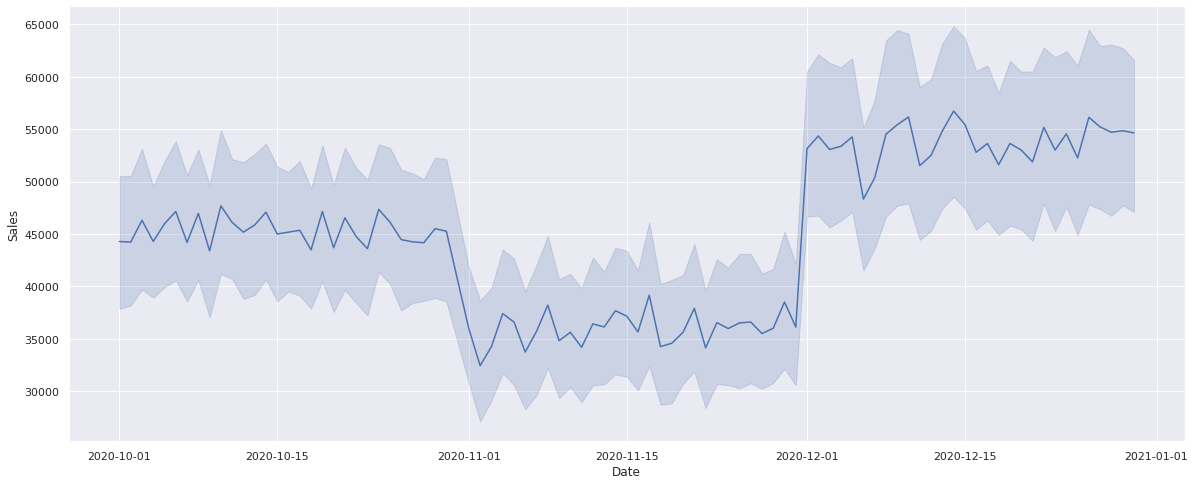

In [43]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x = 'Date', y = 'Sales', data = df)

The sales data indicates that each group sold relatively equally throughout the quarter, suggesting a balanced consumer interest across demographics. Additionally, the time of day had roughly equal sales, indicating that AAL's products appeal consistently regardless of when consumers are shopping.

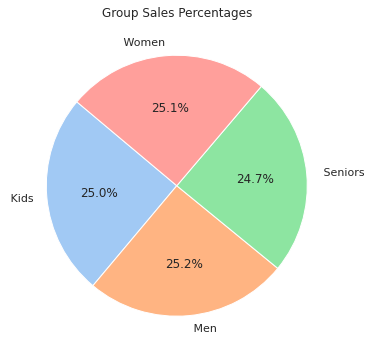

In [44]:
labels = group_pivot[("Sales", "mean")].index.to_list()
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    group_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)

plt.title("Group Sales Percentages")
plt.show()

[' Afternoon', ' Evening', ' Morning']


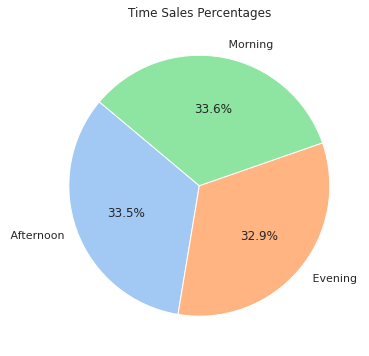

In [45]:
labels = time_pivot[("Sales", "mean")].index.to_list()
print(labels)
colors = sns.color_palette("pastel")[0:5]
plt.figure(figsize=(10, 6))
plt.pie(
    time_pivot[("Sales", "mean")],
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    startangle=140
)
plt.title("Time Sales Percentages")
plt.show()

I suggest creating specific sales programs and marketing plans for the states that are not doing as well. This should include promotional campaigns and products that appeal to local customers. By using these insights, AAL can improve its investment strategies and boost performance across all states, helping to ensure steady growth in the coming year.